In [157]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from operator import itemgetter, attrgetter

# Importing Theoretical Data

In [152]:
#SKMS_all_nuclei-new.dat
#SKP_all_nuclei.dat
#SLY4_all_nuclei-new.dat

#SV-MIN_all_nuclei-new.dat
#UNEDF0_all_nuclei-new.dat
#UNEDF1_all_nuclei-new.dat

#6 Different theoretical Models


names=["SKMS_all_nuclei-new.dat", 
       "SKP_all_nuclei.dat",
       "SLY4_all_nuclei-new.dat", 
       "SV-MIN_all_nuclei-new.dat", 
       "UNEDF0_all_nuclei-new.dat", 
       "UNEDF1_all_nuclei-new.dat"]

#Experimental: skip_header=350, skip_footer=3433-2953
skip_H=[347,  304,  287,  316,  321,  310    ]
#skip_H =[0,    0,    0,    0,    0,    0  ]

top_F=[ 8700, 7478, 7264, 7924, 8300, 8324   ]
#top_F =[0,    0,    0,    0,    0,    0  ]
#skip_F=[0,    0,    0,    0,    0,    0  ]
skip_F=[5606, 4977, 4806, 5176, 5412, 5323   ]

Z_the      =[[],[],[],[],[],[]]
N_the      =[[],[],[],[],[],[]]
A_the      =[[],[],[],[],[],[]]

y_the      =[[],[],[],[],[],[]]
y_the_d    =[{},{},{},{},{},{}]

Q_the      =[[],[],[],[],[],[]]
Q_the_d    =[{},{},{},{},{},{}]

S_p_the    =[[],[],[],[],[],[]]
S_p_the_d  =[{},{},{},{},{},{}]

S_2p_the   =[[],[],[],[],[],[]]
S_2p_the_d =[{},{},{},{},{},{}]


S_n_the    =[[],[],[],[],[],[]]
S_n_the_d  =[{},{},{},{},{},{}]


S_2n_the   =[[],[],[],[],[],[]]
S_2n_the_d =[{},{},{},{},{},{}]

X_the      =[[],[],[],[],[],[]]

ZN_the     =[[],[],[],[],[],[]]
ZN_the_d   =[{},{},{},{},{},{}]
X_the      =[[],[],[],[],[],[]]


for i in range(0,6):
    
    Z_the [i]   = np.genfromtxt(names[i],usecols=1, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of protons
    N_the [i]   = np.genfromtxt(names[i],usecols=2, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of neutrons
    A_the [i]   = N_the[i]+Z_the[i]                     

    y_the [i]   = -np.genfromtxt(names[i],usecols=4, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(y_the[i])):
        y_the_d[i][Z_the[i][j],N_the[i][j]]=y_the[i][j]
    
    
    Q_the [i]   = -np.genfromtxt(names[i],usecols=9, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(Q_the[i])):
        Q_the_d[i][Z_the[i][j],N_the[i][j]]=Q_the[i][j]
    
    
    S_p_the  [i]= -np.genfromtxt(names[i],usecols=5, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_p_the[i])):
        S_p_the_d[i][Z_the[i][j],N_the[i][j]]=S_p_the[i][j]
    
    
    S_2p_the [i]= -np.genfromtxt(names[i],usecols=6, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2p_the[i])):
        S_2p_the_d[i][Z_the[i][j],N_the[i][j]]=S_2p_the[i][j]
    
    
    S_n_the [i] = -np.genfromtxt(names[i],usecols=7, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_n_the[i])):
        S_n_the_d[i][Z_the[i][j],N_the[i][j]]=S_n_the[i][j]
    
    
    S_2n_the[i] = -np.genfromtxt(names[i],usecols=8, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2n_the[i])):
        S_2n_the_d[i][Z_the[i][j],N_the[i][j]]=S_2n_the[i][j]
    
    ZN_the[i]= np.transpose(np.stack( (Z_the[i],N_the[i]) ))
    
    for j in range(0,len(ZN_the[i])):
        ZN_the_d[i][Z_the[i][j], N_the[i][j]]  =ZN_the[i][j]
    
    X_the[i]= np.transpose(np.stack(  (Z_the[i],      #0
                                       N_the[i],      #1
                                       A_the[i],      #2
                                       y_the[i],      #3
                                       S_p_the[i],    #4
                                       S_n_the[i],    #5
                                       S_2p_the[i],   #6
                                       S_2n_the[i],   #7
                                       Q_the[i]) ))   #8
     

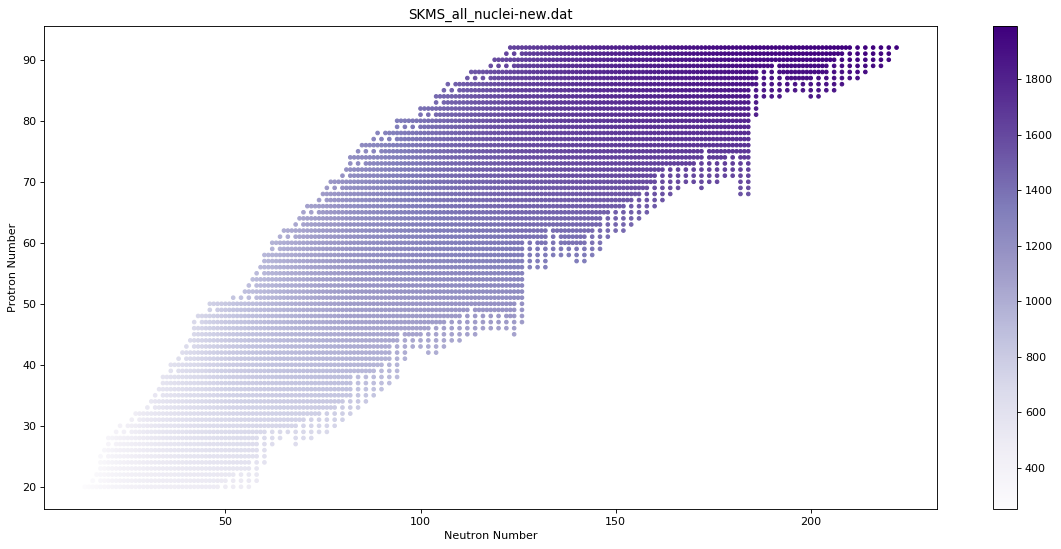

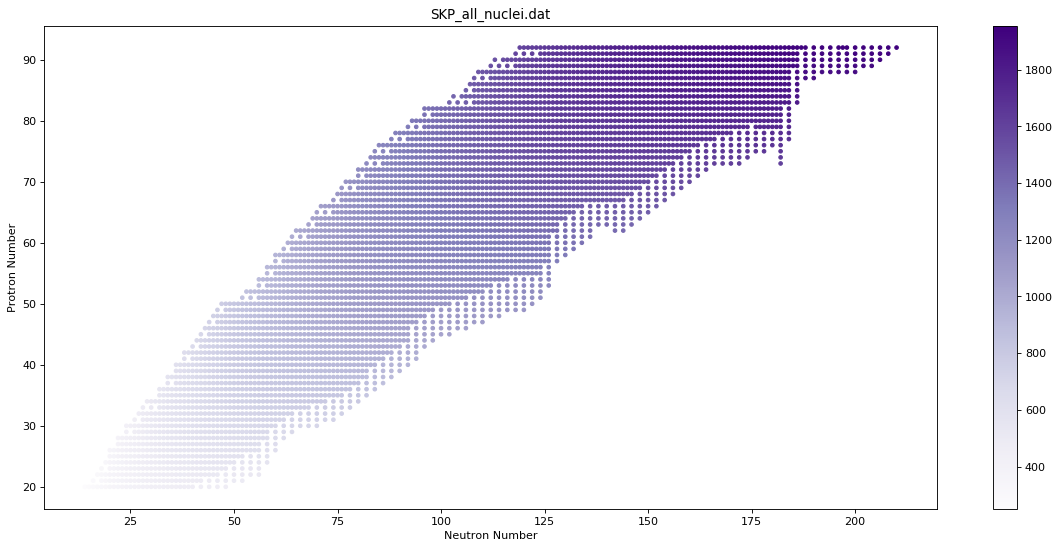

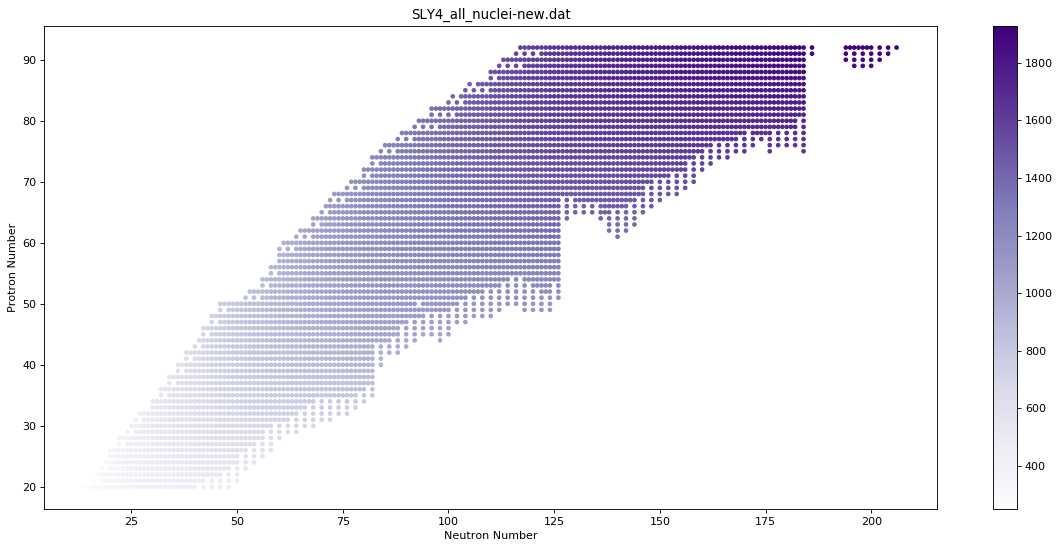

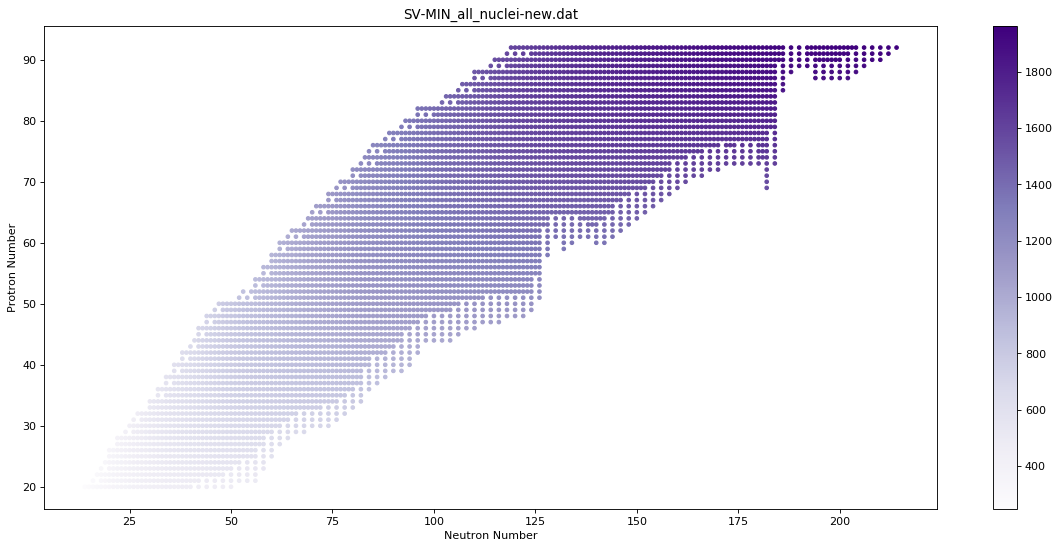

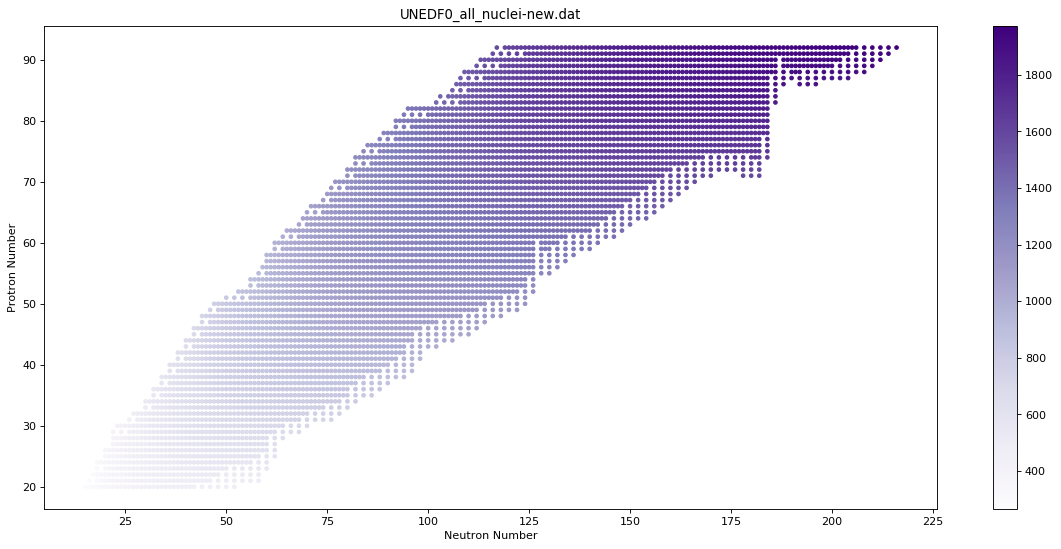

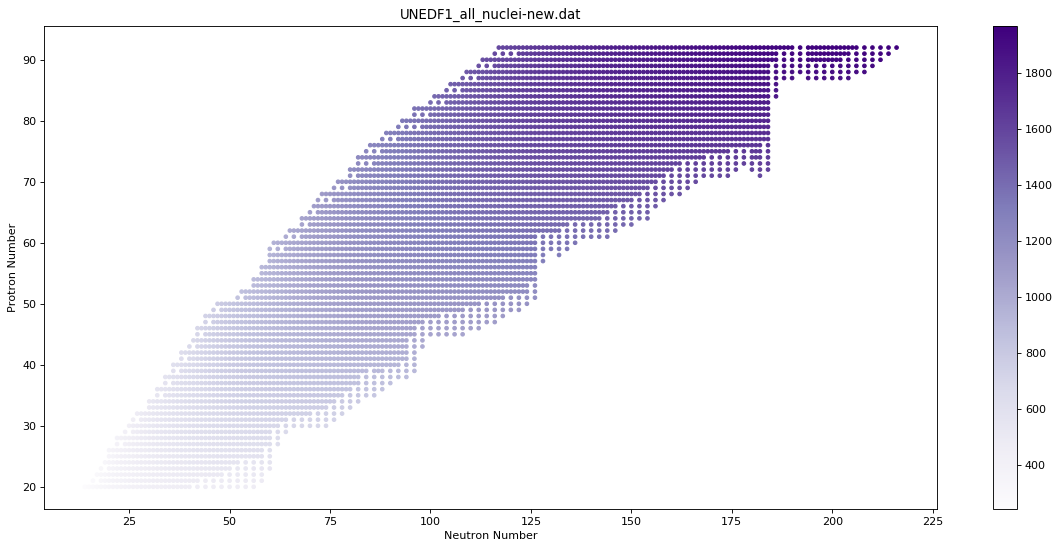

In [149]:
for i in range(0,6):
    ext = np.int(np.ceil(max(y_the[i])))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(N_the[i],Z_the[i],c=y_the[i],cmap='Purples',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    """
       ext = np.int(np.ceil(max(y_mean_err[i])))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_mean_err[i],cmap='Purples',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title("Mean error")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    """

In [156]:
file_names=['SKMS_all_data',
           'SKP_all_data',
           'SLY4_all_data',
           'SV_MIN_all_data',
           'UNEDF0_all_data',
           'UNEDF0_all_data',]



for i in range(0,6):
    file_input=[Z_the[i], N_the[i], A_the[i], Q_the[i], y_the[i] ] # file input symbol, Z, N, A, Q, y 
    
    file_input=np.transpose(np.stack(file_input))
    
    
    np.savetxt(file_names[i], file_input, delimiter=', ')
    print("files made")
    
    
    
    

files made
files made
files made
files made
files made
files made


# Importing Experimental Data

In [164]:
exp_h=350
exp_f=3433-3045

N_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3, skip_header=exp_h, skip_footer=exp_f)
Z_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4, skip_header=exp_h, skip_footer=exp_f)
A_exp    = N_exp+Z_exp                                                        #Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y_exp    = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5, skip_header=exp_h, skip_footer=exp_f)

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12, skip_header=exp_h, skip_footer=exp_f)
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18, skip_header=exp_h, skip_footer=exp_f)

S_n_exp  =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9, skip_header=exp_h, skip_footer=exp_f)
S_2n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15, skip_header=exp_h, skip_footer=exp_f)


ZN_exp   = np.transpose(np.stack((Z_exp, N_exp)))
X_exp    = np.transpose(np.stack((Z_exp, N_exp,   A_exp,   y_exp,   S_p_exp,   S_n_exp,   S_2p_exp,   S_2n_exp)))


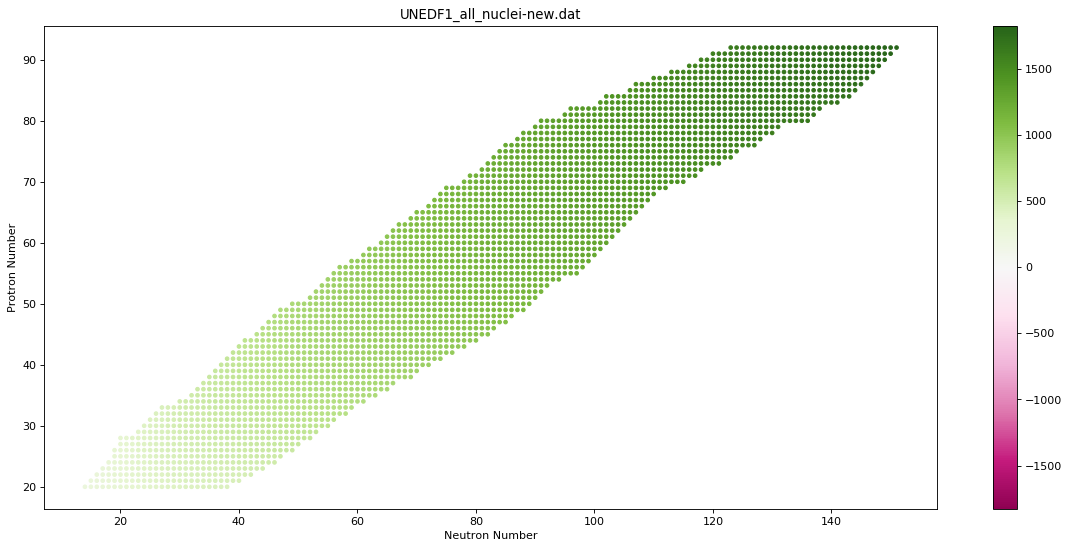

In [165]:
ext = np.int(np.ceil(max(-np.min(y_exp),np.max(y_exp))))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_exp,Z_exp,c=y_exp,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title(names[i])
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()
    